In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3


data_dir = r"C:\Users\vvaib\Downloads\archive (6)\tea sickness dataset"
img_height, img_width = 224, 224
batch_size = 32


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)


train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

val_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')


base_model = InceptionV3(weights='imagenet', include_top=False,               
          input_shape=(224, 224, 3))


for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)



model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, epochs=50, validation_data=val_data)


loss, accuracy = model.evaluate(val_data)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')


Found 711 images belonging to 8 classes.
Found 174 images belonging to 8 classes.
Epoch 1/50


c:\Users\vvaib\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - accuracy: 0.2154 - loss: 2.4919 - val_accuracy: 0.4425 - val_loss: 1.5803
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 76s 3s/step - accuracy: 0.5395 - loss: 1.2787 - val_accuracy: 0.5402 - val_loss: 1.3565
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 95s 4s/step - accuracy: 0.6476 - loss: 1.0304 - val_accuracy: 0.5632 - val_loss: 1.0932
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - accuracy: 0.6609 - loss: 0.8672 - val_accuracy: 0.5747 - val_loss: 1.1538
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.7107 - loss: 0.7736 - val_accuracy: 0.6149 - val_loss: 1.0444
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.7268 - loss: 0.7504 - val_accuracy: 0.6552 - val_loss: 0.9032
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 96s 4s/step - accuracy: 0.7363 - loss: 0.6620 - val_accuracy: 0.5402 - val_loss: 1.1139
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 134s 5s/step - accuracy: 0.7411 - loss: 0.6579 - val_accuracy: 0.6552 - val_loss: 0.9828
Ep

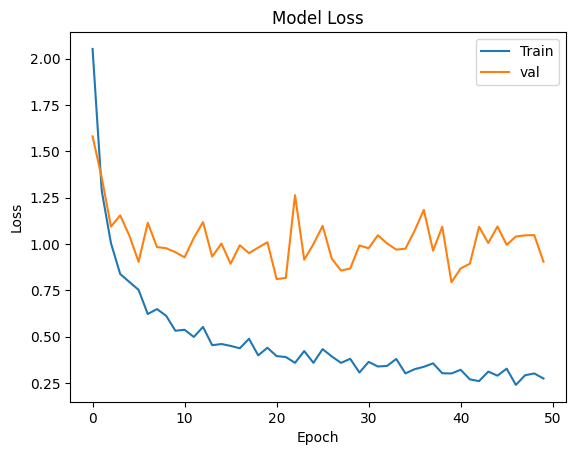

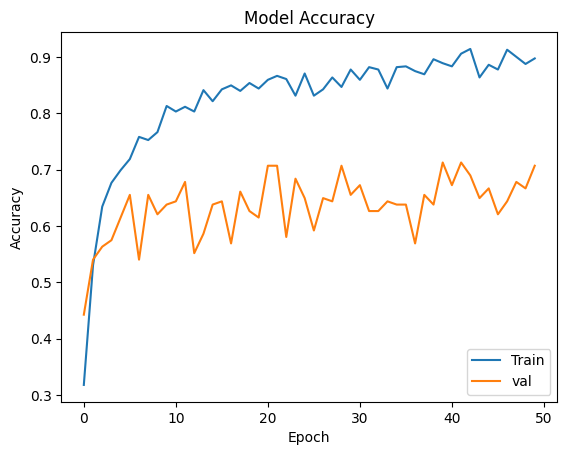

In [6]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper right')
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='lower right')
    plt.show()
plot_loss(history)
plot_accuracy(history)


In [7]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.6)

test_data = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='categorical',
    subset='validation')


Found 528 images belonging to 8 classes.


17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.6377 - loss: 0.8628
Test Loss: 0.8573417663574219
Test Accuracy: 0.6553030014038086
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step
              precision    recall  f1-score   support

           0       0.06      0.02      0.03        60
           1       0.13      0.16      0.15        67
           2       0.08      0.05      0.06        60
           3       0.10      0.06      0.07        67
           4       0.09      0.18      0.12        60
           5       0.09      0.09      0.09        44
           6       0.08      0.06      0.07        85
           7       0.15      0.20      0.17        85

    accuracy                           0.11       528
   macro avg       0.10      0.10      0.09       528
weighted avg       0.10      0.11      0.10       528

Confusion Matrix:
[[ 1 10  3  5 14  4 11 12]
 [ 1 11  5  7 11  6  8 18]
 [ 1 13  3  6 15  4  8 10]
 [ 3 10  5  4 13  6 10 16]
 [ 3 10  6  5 11  6  6 13]
 [ 1  4  4  4 14  4 

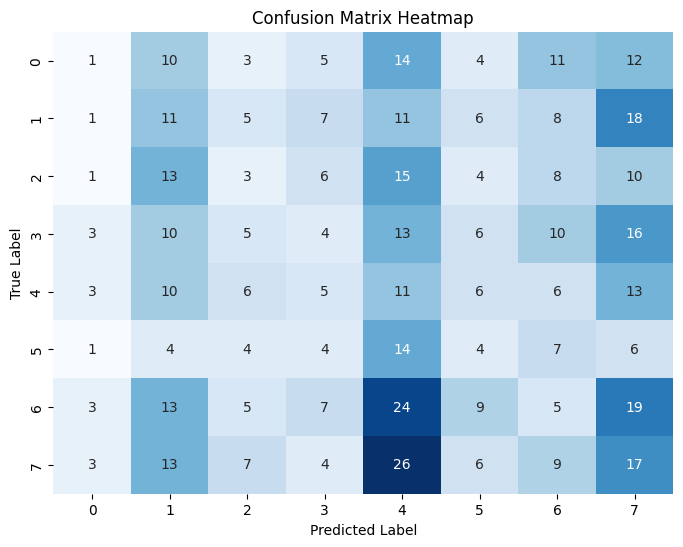

In [21]:
loss, accuracy = model.evaluate(test_data)


print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

true_labels = test_data.classes

predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

print(classification_report(true_labels, predicted_labels))

cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)


import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    train_data,
    epochs=50,
    batch_size=batch_size,
    validation_data=val_data
)



c:\Users\vvaib\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 126s 5s/step - accuracy: 0.1637 - loss: 2.1164 - val_accuracy: 0.2759 - val_loss: 1.8294
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.3144 - loss: 1.6032 - val_accuracy: 0.3793 - val_loss: 1.6043
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.3766 - loss: 1.3061 - val_accuracy: 0.3621 - val_loss: 1.3139
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - accuracy: 0.4016 - loss: 1.2331 - val_accuracy: 0.4310 - val_loss: 1.4622
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 93s 3s/step - accuracy: 0.4248 - loss: 1.1931 - val_accuracy: 0.4195 - val_loss: 1.2229
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accuracy: 0.5293 - loss: 1.0605 - val_accuracy: 0.5057 - val_loss: 1.1515
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step - accuracy: 0.5561 - loss: 1.0265 - val_accuracy: 0.4138 - val_loss: 1.3135
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - accuracy: 0.5258 - loss: 0.9678 - val_accuracy: 0.4425 - val_l

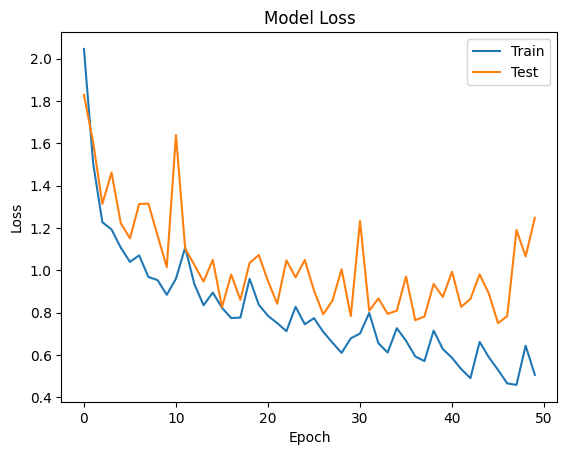

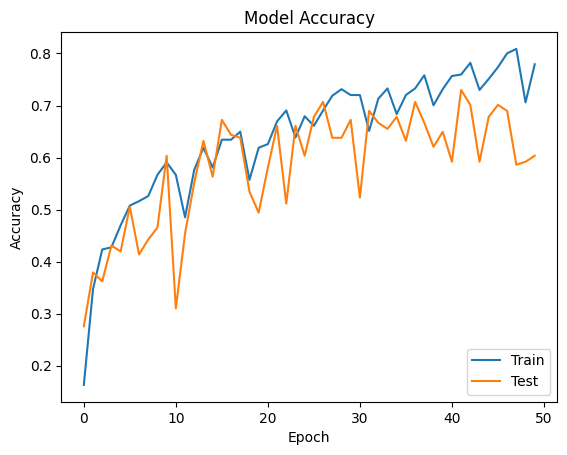

In [15]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='lower right')
    plt.show()

plot_loss(history)
plot_accuracy(history)

17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.7097 - loss: 0.7673
Test Loss: 0.7926850914955139
Test Accuracy: 0.7026515007019043
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step
              precision    recall  f1-score   support

           0       0.19      0.05      0.08        60
           1       0.12      0.15      0.13        67
           2       0.08      0.07      0.07        60
           3       0.20      0.10      0.14        67
           4       0.15      0.28      0.19        60
           5       0.07      0.07      0.07        44
           6       0.17      0.13      0.15        85
           7       0.15      0.21      0.18        85

    accuracy                           0.14       528
   macro avg       0.14      0.13      0.13       528
weighted avg       0.14      0.14      0.13       528

Confusion Matrix:
[[ 3  9  4  5 19  3  7 10]
 [ 2 10  5  3 10 12  9 16]
 [ 1 11  4  1 11  6 11 15]
 [ 0 10  6  7 18  2  5 19]
 [ 2  7  4  3 17  4  9 14]
 [ 1 10  4  2  7  3 

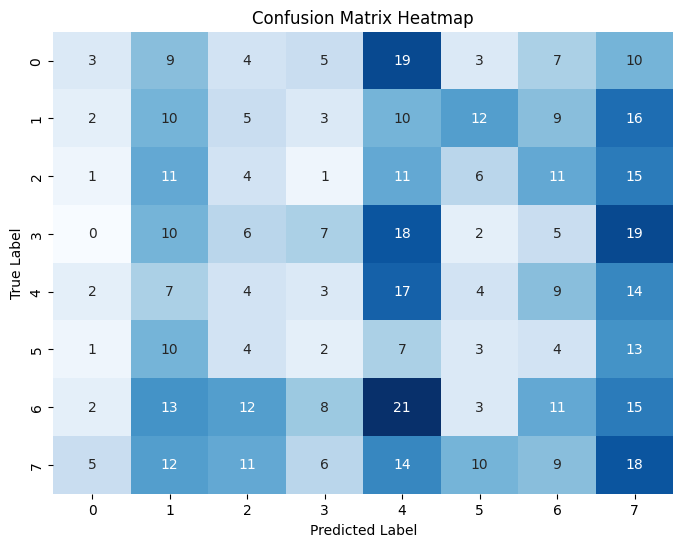

In [20]:

loss, accuracy = model.evaluate(test_data)


print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

true_labels = test_data.classes

predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

print(classification_report(true_labels, predicted_labels))

cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)


import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [26]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


base_model = VGG16(weights='imagenet', include_top=False, 
                   input_shape=(224, 224, 3))


model = Sequential()
model.add(base_model)


for layer in base_model.layers:
    layer.trainable = False


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(8, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=50,
    batch_size=batch_size,
    validation_data=val_data
)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 410s 16s/step - accuracy: 0.1859 - loss: 4.8311 - val_accuracy: 0.3506 - val_loss: 1.7058
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 505s 21s/step - accuracy: 0.4650 - loss: 1.4395 - val_accuracy: 0.3678 - val_loss: 1.5202
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 443s 17s/step - accuracy: 0.5572 - loss: 1.1497 - val_accuracy: 0.6034 - val_loss: 1.1246
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 371s 14s/step - accuracy: 0.6531 - loss: 0.9089 - val_accuracy: 0.5345 - val_loss: 1.1654
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 315s 13s/step - accuracy: 0.6627 - loss: 0.8748 - val_accuracy: 0.6034 - val_loss: 1.0599
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 272s 12s/step - accuracy: 0.7011 - loss: 0.7758 - val_accuracy: 0.4770 - val_loss: 1.3037
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 322s 13s/step - accuracy: 0.7462 - loss: 0.7241 - val_accuracy: 0.6379 - val_loss: 0.9318
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 306s 12s/step - accuracy: 0.7884 - loss: 0.6401 - val_accuracy: 0.

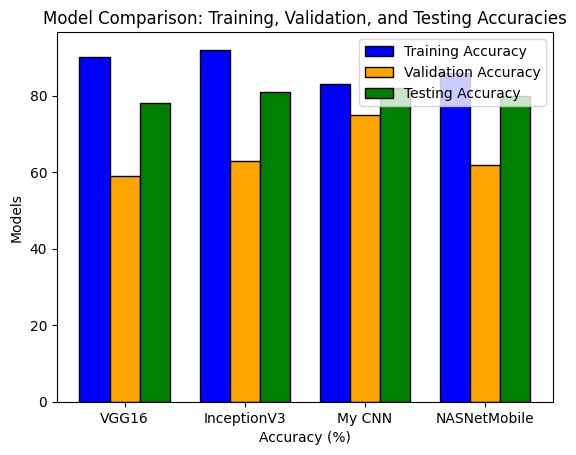

In [ ]:
import matplotlib.pyplot as plt


model_names = ['VGG16', 'InceptionV3', 'Sequential']
train_accuracy = [90, 92, 83]
val_accuracy = [59, 63, 75]
test_accuracy = [78, 81, 82]

bar_width = 0.25


r1 = range(len(model_names))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, train_accuracy, color='blue', width=bar_width, edgecolor='black', label='Training Accuracy')
plt.bar(r2, val_accuracy, color='orange', width=bar_width, edgecolor='black', label='Validation Accuracy')
plt.bar(r3, test_accuracy, color='green', width=bar_width, edgecolor='black', label='Testing Accuracy')


plt.xlabel('Accuracy (%)')
plt.ylabel('Models')
plt.title('Model Comparison: Training, Validation, and Testing Accuracies')


plt.xticks([r + bar_width for r in range(len(model_names))], model_names)


plt.legend()
plt.show()


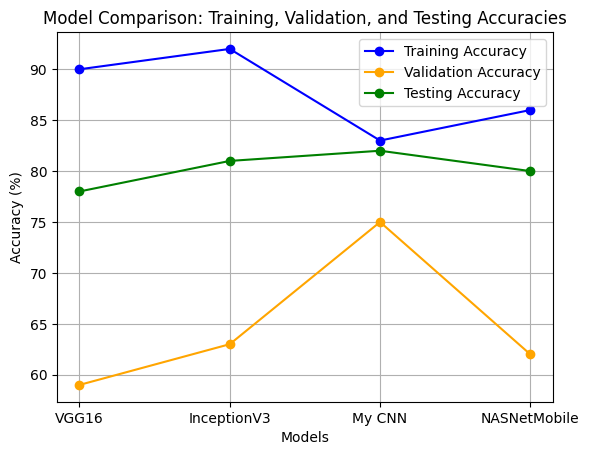

In [10]:
import matplotlib.pyplot as plt


model_names = ['VGG16', 'InceptionV3', 'My CNN']
train_accuracy = [90, 92, 83]
val_accuracy = [59, 63, 75]
test_accuracy = [78, 81, 82]


plt.plot(model_names, train_accuracy, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(model_names, val_accuracy, marker='o', linestyle='-', color='orange', label='Validation Accuracy')
plt.plot(model_names, test_accuracy, marker='o', linestyle='-', color='green', label='Testing Accuracy')


plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison: Training, Validation, and Testing Accuracies')

plt.legend()
plt.grid(True)
plt.show()


In [12]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

true_labels = test_data.classes


predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)

print(classification_report(true_labels, predicted_labels))


17/17 ━━━━━━━━━━━━━━━━━━━━ 115s 7s/step
              precision    recall  f1-score   support

           0       0.12      0.08      0.10        60
           1       0.12      0.10      0.11        67
           2       0.05      0.05      0.05        60
           3       0.13      0.12      0.12        67
           4       0.17      0.23      0.19        60
           5       0.09      0.09      0.09        44
           6       0.23      0.24      0.23        85
           7       0.14      0.15      0.15        85

    accuracy                           0.14       528
   macro avg       0.13      0.13      0.13       528
weighted avg       0.14      0.14      0.14       528

